<a href="https://colab.research.google.com/github/Aabhinavjain/UWOD/blob/main/underwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

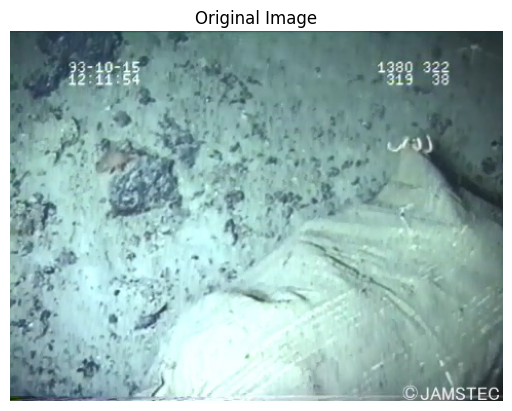

In [ ]:
#=========================== IMPORT PACKAGES ===========================

import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import cv2
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

#============================ READ A INPUT IMAGE =========================

import matplotlib.image as mpimg
from skimage.transform import resize

img = mpimg.imread("/content/drive/MyDrive/Input/0000001.jpg")
plt.imshow(img)
plt.title('Original Image')
plt.axis ('off')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


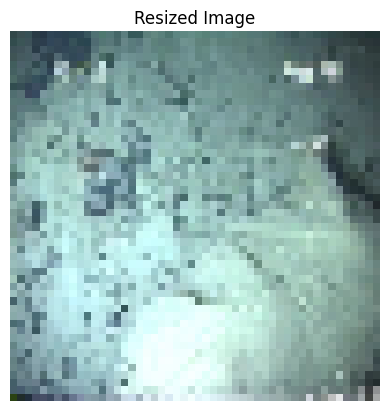

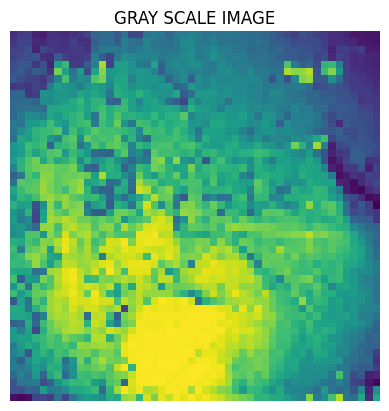

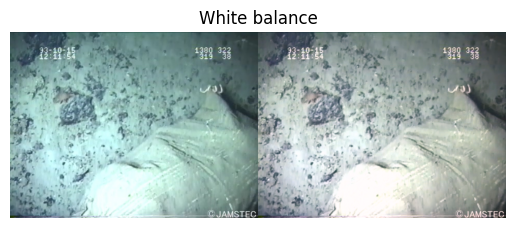

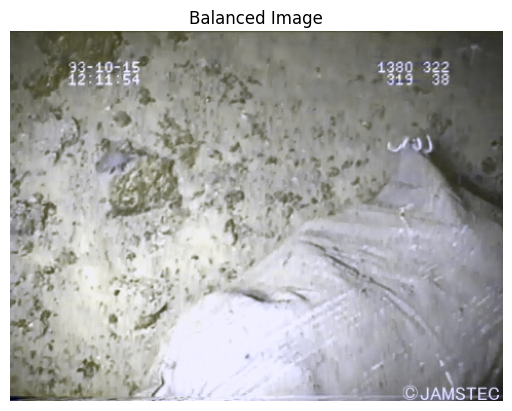

In [ ]:
#============================ PREPROCESSING =============================

#==== RESIZE IMAGE ====

resized_image = resize(img, (300,300),anti_aliasing=True)
img_resize_orig = cv2.resize(img,((50, 50)))

plt.title('Resized Image')
plt.imshow(img_resize_orig)
plt.axis ('off')
plt.show()

#==== GRAYSCALE IMAGE ====

try:
    gray1 = cv2.cvtColor(img_resize_orig, cv2.COLOR_BGR2GRAY)

except:
    gray1 = img_resize_orig

fig = plt.figure()
plt.title('GRAY SCALE IMAGE')
plt.imshow(gray1)
plt.axis ('off')
plt.show()


#============================ IMAGE ENHANCING =============================

#=== WHITE BALANCE TECHNIQUES ===

def show(final):
    plt.imshow(final)
    plt.title('White balance')
    plt.axis ('off')
    plt.show()

def white_balance_loops(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    for x in range(result.shape[0]):
        for y in range(result.shape[1]):
            l, a, b = result[x, y, :]
            # fix for CV correction
            l *= 100 / 255.0
            result[x, y, 1] = a - ((avg_a - 128) * (l / 100.0) * 1.1)
            result[x, y, 2] = b - ((avg_b - 128) * (l / 100.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

final = np.hstack((img, white_balance_loops(img)))
show(final)


r, g, b = cv2.split(img)
r_avg = cv2.mean(r)[0]
g_avg = cv2.mean(g)[0]
b_avg = cv2.mean(b)[0]

k = (r_avg + g_avg + b_avg) / 3
kr = k / r_avg
kg = k / g_avg
kb = k / b_avg

r = cv2.addWeighted(src1=r, alpha=kr, src2=0, beta=0, gamma=0)
g = cv2.addWeighted(src1=g, alpha=kg, src2=0, beta=0, gamma=0)
b = cv2.addWeighted(src1=b, alpha=kb, src2=0, beta=0, gamma=0)


balance_img = cv2.merge([b, b, r])
plt.imshow(balance_img)
plt.title('Balanced Image')
plt.axis ('off')
plt.show()

In [ ]:
#============================ CLASSIFICATION =============================

# === CNN ===


import os

# === test and train ===

from sklearn.model_selection import train_test_split

data_test = os.listdir('/content/drive/MyDrive/Data/Test/')


data_train = os.listdir('/content/drive/MyDrive/Data/Train/')



dot1= []
labels1 = []
for img1 in data_test:
        # print(img)
        img_1 = cv2.imread('/content/drive/MyDrive/Data/Test/' + "/" + img1)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

        except:
            gray = img_1


        dot1.append(np.array(gray))
        labels1.append(0)


for img1 in data_train:
    try:
        img_2 = cv2.imread('/content/drive/MyDrive/Data/Train/'+ "/" + img1)
        img_2 = cv2.resize(img_2,((50, 50)))



        try:
            gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

        except:
            gray = img_2

        dot1.append(np.array(gray))
        labels1.append(1)
    except:
        None

x_train, x_test, y_train, y_test = train_test_split(dot1,labels1,test_size = 0.2, random_state = 101)

from keras.utils import to_categorical


y_train1=np.array(y_train)
y_test1=np.array(y_test)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)




x_train2=np.zeros((len(x_train),50,50,3))
for i in range(0,len(x_train)):
        x_train2[i,:,:,:]=x_train2[i]

x_test2=np.zeros((len(x_test),50,50,3))
for i in range(0,len(x_test)):
        x_test2[i,:,:,:]=x_test2[i]

print("-------------------------------------------------------------")
print('Convolutional Neural Network')
print("-------------------------------------------------------------")
print()
print()


# initialize the model
model=Sequential()


#CNN layes
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(500,activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(2,activation="softmax"))

#summary the model
model.summary()

#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train1=np.array(y_train)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)

#fit the model
history=model.fit(x_train2,train_Y_one_hot,batch_size=2,epochs=10,verbose=1)
accuracy = model.evaluate(x_test2, test_Y_one_hot, verbose=1)

print()
print()
print("-------------------------------------------------------------")
print("Performance Analysis")
print("-------------------------------------------------------------")
print()

accuracy=history.history['accuracy']
accuracy=max(accuracy)
accuracy=100-accuracy
print()
print("1.Accuracy  :",accuracy,'%')

-------------------------------------------------------------
Convolutional Neural Network
-------------------------------------------------------------


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (Non

In [ ]:
pip install xmltodict


-----------------------------------
Detected
------------------------------------



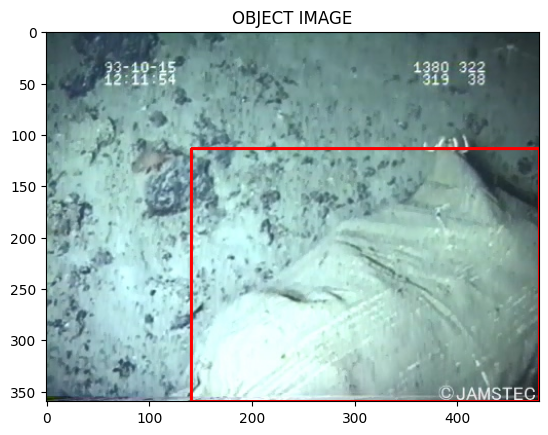

The detected object is 

Cloth



In [ ]:
#================================= DETECTION =============================


import xml.etree.ElementTree as ET
filename ="/content/drive/MyDrive/Input/0000001.jpg"

ff = filename[0:len(filename)-4]+str('.xml')
xml_data = open(ff, 'r').read()
root = ET.XML(xml_data)

data = []
cols = []
vval = []
cols1 = []
vval2 = []

for i, child in enumerate(root):
    data.append([subchild.text for subchild in child])
    cols.append(child.tag)
    vval2.append([subchildds.text for subchildds in child])
    vval.append([subchildd.tag for subchildd in child])


import xml.etree.ElementTree as ET
import pandas as pd

import matplotlib.pyplot as plt
df = pd.DataFrame(data).T
df.columns = cols
# print(df)

df1 = pd.DataFrame(vval).T
df1.columns = cols
# print(df1)

print()
print("-----------------------------------")
print("Detected")
print("------------------------------------")
print()

DD = df['object']

import xmltodict
import pandas as pd

xml_data = open(ff, 'r').read()
xmlDict = xmltodict.parse(xml_data)


colsss = xmlDict['annotation']
Dims = colsss['object']
Dims1 = Dims['bndbox']
D1 = int(Dims1['xmax'])
D2 = int(Dims1['xmin'])
D3 = int(Dims1['ymax'])
D4 = int(Dims1['ymin'])

import cv2
AZ = cv2.rectangle(img, (D1, D4), (D2, D3), (255,0,0), 2)

plt.imshow(AZ)
plt.title('OBJECT IMAGE')
plt.show()
print("The detected object is ")
print("=======================")
print()
det=Dims['name']
print(det)
print()
print("=======================")

